# Naïve Bayes

## Importar las librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score

## Importar el conjunto de datos

In [2]:
# Cargar datos del archivo covtype.data
df = pd.read_csv("covtype.data", header=None)

max_samples = 10000
print(df.info())

df = df.head(max_samples)
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       581012 non-null  int64
 1   1       581012 non-null  int64
 2   2       581012 non-null  int64
 3   3       581012 non-null  int64
 4   4       581012 non-null  int64
 5   5       581012 non-null  int64
 6   6       581012 non-null  int64
 7   7       581012 non-null  int64
 8   8       581012 non-null  int64
 9   9       581012 non-null  int64
 10  10      581012 non-null  int64
 11  11      581012 non-null  int64
 12  12      581012 non-null  int64
 13  13      581012 non-null  int64
 14  14      581012 non-null  int64
 15  15      581012 non-null  int64
 16  16      581012 non-null  int64
 17  17      581012 non-null  int64
 18  18      581012 non-null  int64
 19  19      581012 non-null  int64
 20  20      581012 non-null  int64
 21  21      581012 non-null  int64
 22  22      581012 non-n

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2845,77,15,201,86,1507,238,212,101,1451,...,0,1,0,0,0,0,0,0,0,5
9996,2828,74,18,150,68,1556,239,203,89,1460,...,0,1,0,0,0,0,0,0,0,5
9997,3245,309,16,150,57,150,173,227,194,1557,...,0,0,0,0,0,0,0,0,0,1
9998,3245,33,12,335,46,430,218,214,131,1298,...,0,0,0,0,0,0,0,0,0,1


# Dividivir la variable respuesta del conjunto de datos

In [3]:
X = df.iloc[:, :-1].values  # Todas las filas, todas las columnas excepto la última
y = df.iloc[:, -1].values  # Todas las filas, última columna

## División del conjunto de datos en un conjunto para entrenamiento y otro para pruebas

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import pandas as pd 

def evaluar_nb(num_muestras):
    X_subset, y_subset = X[:num_muestras], y[:num_muestras]

    X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X_subset, y_subset, test_size=0.25, random_state=42)
    
    normalizador = StandardScaler()
    X_entreno = normalizador.fit_transform(X_entreno)
    X_prueba = normalizador.transform(X_prueba)

    clasificador = GaussianNB()
    inicio = time.time()
    clasificador.fit(X_entreno, y_entreno)
    fin = time.time()
    y_pred = clasificador.predict(X_prueba)
    
    mat_conf = confusion_matrix(y_prueba, y_pred)
    accuracy = accuracy_score(y_prueba, y_pred)
    tiempo_ejecucion = fin - inicio

    results[num_muestras] = { 
        'accuracyScore': accuracy,
        'executionTime': tiempo_ejecucion
    }
    
    return tiempo_ejecucion

## Escalamiento o normalización de variables (Features)

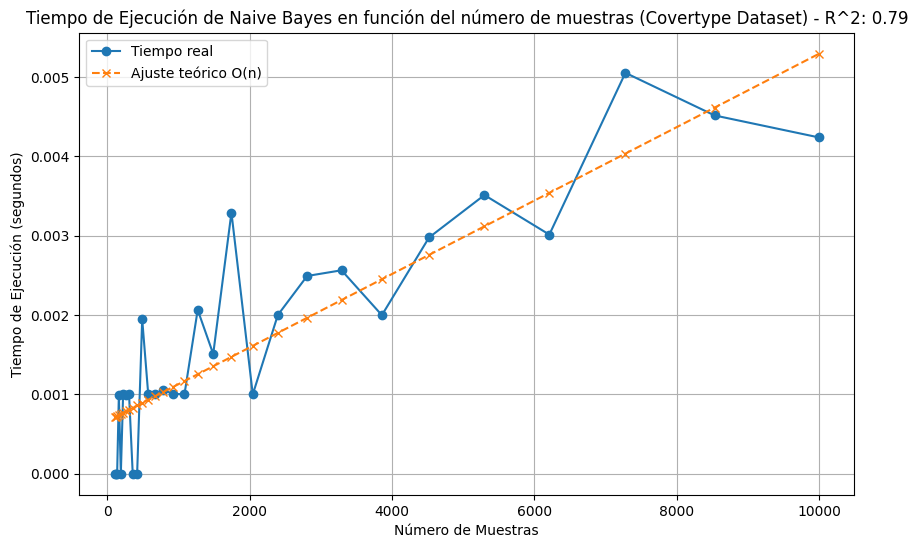

no. 100 : accuracy = 0.56, tiempo = 0.0
no. 117 : accuracy = 0.5666666666666667, tiempo = 0.0
no. 137 : accuracy = 0.5142857142857142, tiempo = 0.0
no. 161 : accuracy = 0.4878048780487805, tiempo = 0.0009891986846923828
no. 189 : accuracy = 0.5208333333333334, tiempo = 0.0
no. 221 : accuracy = 0.5178571428571429, tiempo = 0.0010023117065429688
no. 259 : accuracy = 0.49230769230769234, tiempo = 0.0009961128234863281
no. 304 : accuracy = 0.5789473684210527, tiempo = 0.0010063648223876953
no. 356 : accuracy = 0.48314606741573035, tiempo = 0.0
no. 418 : accuracy = 0.45714285714285713, tiempo = 0.0
no. 489 : accuracy = 0.43089430894308944, tiempo = 0.001947641372680664
no. 574 : accuracy = 0.2152777777777778, tiempo = 0.0009999275207519531
no. 672 : accuracy = 0.42857142857142855, tiempo = 0.0009989738464355469
no. 788 : accuracy = 0.2436548223350254, tiempo = 0.001055002212524414
no. 924 : accuracy = 0.22077922077922077, tiempo = 0.0010068416595458984
no. 1083 : accuracy = 0.41697416974169

In [7]:
from sklearn.linear_model import LinearRegression
# Generar 30 tamaños de muestra de manera progresiva hasta el límite de max_samples
results = {}
tamanos_muestras = np.unique(np.round(np.logspace(np.log10(100), np.log10(max_samples), 30)).astype(int))
tiempos_ejecucion = [evaluar_nb(n) for n in tamanos_muestras]


# Calcular el tiempo teórico (lineal en función del número de muestras)
tiempos_teoricos = [n for n in tamanos_muestras]

# Realizar la regresión lineal
model = LinearRegression()
model.fit(np.array(tiempos_teoricos).reshape(-1, 1), tiempos_ejecucion)
tiempos_predichos = model.predict(np.array(tiempos_teoricos).reshape(-1, 1))

# Calcular R^2
r_squared = r2_score(tiempos_ejecucion, tiempos_predichos)

# Crear y mostrar la gráfica comparativa
plt.figure(figsize=(10, 6))
plt.plot(tamanos_muestras, tiempos_ejecucion, marker='o', linestyle='-', label='Tiempo real')
plt.plot(tamanos_muestras, tiempos_predichos, marker='x', linestyle='--', label='Ajuste teórico O(n)')
plt.title(f'Tiempo de Ejecución de Naive Bayes en función del número de muestras (Covertype Dataset) - R^2: {r_squared:.2f}')
plt.xlabel('Número de Muestras')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.legend()
plt.grid(True)
plt.show()


for key, value in results.items():
    print(f"no. {key} : accuracy = {value['accuracyScore']}, tiempo = {value['executionTime']}")
